In [1]:
import os
import numpy as np
import pandas as pd
from scipy.sparse import dok_matrix
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from ggplot import *
import pickle
import feather
from collections import Counter
from scipy.io import mmread

In [2]:
sample = feather.read_dataframe("./sample.feather")
sample.head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments
0,--DwgB78t-c,PT2M36S,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3,UCdzU3DSGzyWzN2118yd9X9g,Abdullah AYDIN,2012-01-19 18:20:02,1671,10,1,0
1,--NZRkXBV7k,PT4M53S,Carlos Santana presents Cindy Blackman in Mexi...,UC0UnhAG47DRyVZGVcbhAXhQ,Saul TP,2015-03-30 04:04:40,9994,41,3,2
2,--hoQ2sGG4M,PT4M35S,"Taoist monk Tian Xin Shan in Brazil,Wudang San...",UCXjtAvK5P3wXBGh0vbGylzg,TheTVtaoista,2009-08-07 06:36:33,3407,8,1,2
3,--sBoaqBlzA,PT8M19S,"MAKEUP FOR GUYS: Actors, TV Hosts, On Camera ...",UCeKHMeUlcLNPLCLUfZUQI2w,Tiffany Hendra,2011-08-04 00:47:49,15816,120,2,8
4,--7h1S4neDM,PT3M19S,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0


In [3]:
videos = pd.read_csv("../train_labels.csv", header=None)

In [48]:
videos.columns = ['video_id', 'labels']

In [49]:
videos.head()

,video_id,labels
0,--DwgB78t-c,16 5 430
1,--NZRkXBV7k,128 3 39 7 44 13 16 30
2,--hoQ2sGG4M,694
3,--ABhs9ik7c,2232 1 4 517 270
4,--sBoaqBlzA,45 125


In [30]:
label_mat = mmread('./label_mat.mtx')

In [36]:
sel = np.concatenate([label_mat.getcol(i).todense() for i in range(20)], axis=1)

In [37]:
sel.shape

(4906660, 20)

In [50]:
videos_top = pd.concat([videos['video_id'], pd.DataFrame(sel)], axis=1)

In [51]:
videos_top.head()

,video_id,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,--DwgB78t-c,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,--NZRkXBV7k,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,--hoQ2sGG4M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,--ABhs9ik7c,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,--sBoaqBlzA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
videos_top['is_in'] = np.sum(videos_top.ix[:, 1:], axis=1) > 0

In [53]:
videos_top.query('is_in == True').shape

(3385653, 22)

In [54]:
videos_sel = videos_top.query('is_in == True')

In [55]:
sample_top = sample.merge(videos_sel, on='video_id')

In [95]:
feather.write_dataframe(sample_top, "sample_top.feather")

In [56]:
sample_top.head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments,...,11,12,13,14,15,16,17,18,19,is_in
0,--DwgB78t-c,PT2M36S,Fruto Dulce - Geraldine Rojas & Ezequiel Paludi 3,UCdzU3DSGzyWzN2118yd9X9g,Abdullah AYDIN,2012-01-19 18:20:02,1671,10,1,0,...,0,0,0,0,0,1,0,0,0,True
1,--NZRkXBV7k,PT4M53S,Carlos Santana presents Cindy Blackman in Mexi...,UC0UnhAG47DRyVZGVcbhAXhQ,Saul TP,2015-03-30 04:04:40,9994,41,3,2,...,0,0,1,0,0,1,0,0,0,True
2,--7h1S4neDM,PT3M19S,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0,...,0,0,0,0,0,0,0,0,0,True
3,--ezS5q-mZg,PT6M10S,McDonald's Beef,UCZNDDbxNipTnfrSH4NpuoOw,TimothyMBoudreaux,2010-03-09 19:45:08,8376,10,2,7,...,0,1,0,0,0,0,0,0,0,True
4,--XT8O4T3Wc,PT5M3S,Concealed the Conclusion - Stage 2C Theme: Wes...,UCgg5HS1oVuMSoGRPuHo-b_A,Hawelo92,2010-06-26 14:40:26,8119,44,0,3,...,0,0,0,0,0,0,0,0,0,True


In [57]:
sample_top.shape

(470331, 31)

In [58]:
sample.shape

(681819, 10)

In [97]:
sample_top.ix[sample_top[0] == 1, :].head()

,video_id,duration,title,channel_id,channel_title,published_at,views,likes,dislikes,comments,...,11,12,13,14,15,16,17,18,19,is_in
2,--7h1S4neDM,00:03:19,Pet Rescue Saga Level 539 2 Stars No Boosts,UCNWPDyaWf2eAHnofFLSnEMg,All Gamers,2014-04-29 15:44:44,2167,1,0,0,...,0,0,0,0,0,0,0,0,0,True
5,--Qgwg7mGZY,00:07:28,GRFS Goblin Gun Set Up and Review!,UCCNZDSGjG6xEoz2lv4FThMQ,Travis Conover,2012-06-05 12:37:29,6452,82,4,36,...,0,0,0,0,0,0,0,0,0,True
6,--pQCGgGjE8,00:03:32,Kingdom Hearts- Behemoth (Expert),UCDUi7yW7tJ7QWJZgK8sRLLQ,RoxasNova,2009-03-14 13:11:06,1037,11,0,4,...,0,0,0,0,0,0,0,0,0,True
14,--o719vqu6Q,00:03:50,WPIAL Finals 2006 Fox Chapel vs. Ambridge - En...,UC9fwbix0hNiFQ-nhU209UXw,pokeeffe,2006-10-25 16:21:55,1679,3,0,1,...,0,0,0,0,0,0,0,0,0,True
15,--sW2Fk-LmY,00:06:28,Обзор модов [10]: Jammy Furnityre Mod - Уютная...,UC5rEKljNZfKS14WhkZ9o_oA,frostbool,2012-08-28 03:30:06,23122,251,6,22,...,0,0,0,0,0,0,0,0,0,True


In [96]:
durations = pd.to_timedelta(sample_top['duration'].apply(lambda s: s[2:]))
sample_top['duration'] = durations

In [63]:
labels = pickle.load(open('./labels.pkl', 'rb'))

In [64]:
labels.head(20)

,label_id,label_name,count
0,0,Games,859519
1,1,Vehicle,678257
2,2,Video game,518981
3,3,Concert,494707
4,4,Car,371391
5,5,Dance,303295
6,6,Animation,296624
7,7,Musician,295199
8,8,Football,217920
9,9,Music video,214887


In [99]:
rows = []
for n in range(20):
    selected = sample_top.ix[sample_top[n] == 1, :]
    label_name = labels['label_name'][n]
    rows += [[label_name, 
              np.median(selected['views']),
              np.median(selected.query('likes >= 0')['likes']),
              np.median(selected.query('dislikes >= 0')['dislikes']), 
              np.median(selected.query('comments >= 0')['comments']), 
              np.median(selected['duration'] / np.timedelta64(1, 's'))]]
rows = pd.DataFrame(rows)
rows.columns = ['tag', 'views', 'likes', 'dislikes', 'comments', 'seconds']

In [100]:
rows

,tag,views,likes,dislikes,comments,seconds
0,Games,4462.0,20.0,2.0,8.0,257.0
1,Vehicle,4373.0,10.0,1.0,3.0,226.0
2,Video game,5076.0,31.0,3.0,13.0,270.0
3,Concert,3790.0,14.0,0.0,2.0,247.0
4,Car,4882.0,11.0,1.0,3.0,224.0
5,Dance,3162.5,8.0,1.0,1.0,227.0
6,Animation,6886.0,29.0,2.0,6.0,225.0
7,Musician,3611.0,15.0,1.0,2.0,249.0
8,Football,3871.0,12.0,1.0,2.0,227.0
9,Music video,7460.0,54.0,3.0,7.0,228.0


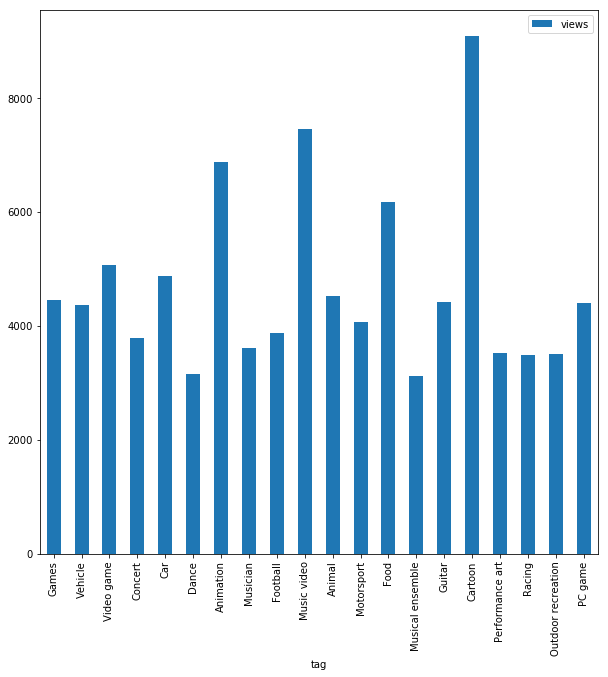

In [87]:
rows.plot.bar(x='tag', y='views', figsize=(10, 10))

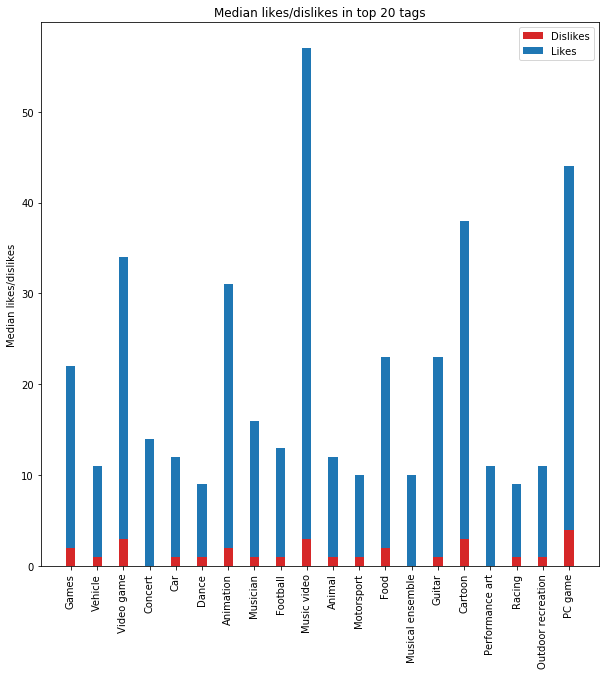

In [92]:
plt.figure(figsize=(10, 10))
ind = np.arange(20)
width = 0.35
p1 = plt.bar(ind, rows['dislikes'], width, color='#d62728')
p2 = plt.bar(ind, rows['likes'], width,
             bottom=rows['dislikes'])

plt.ylabel('Median likes/dislikes')
plt.title('Median likes/dislikes in top 20 tags')
plt.xticks(ind, rows['tag'], rotation='vertical')
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Dislikes', 'Likes'))

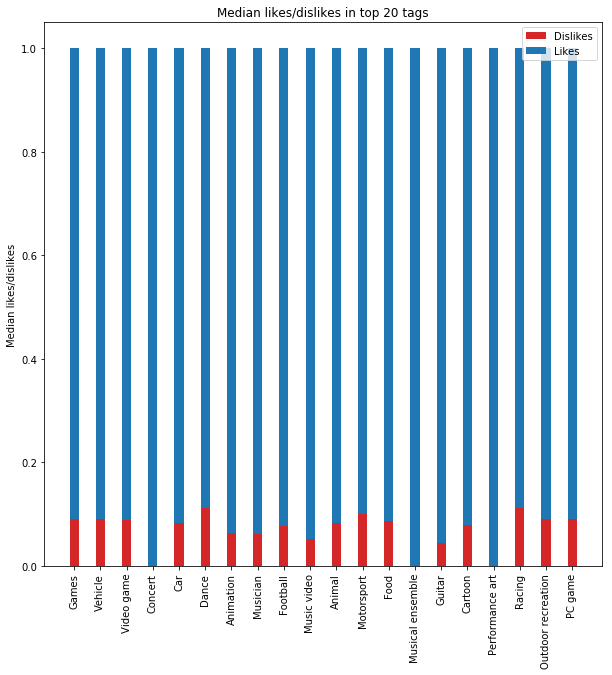

In [93]:
plt.figure(figsize=(10, 10))
ind = np.arange(20)
width = 0.35
sums = rows['likes'] + rows['dislikes']
p1 = plt.bar(ind, rows['dislikes'] / sums, width, color='#d62728')
p2 = plt.bar(ind, rows['likes'] /sums, width,
             bottom=rows['dislikes'] / sums)

plt.ylabel('Median likes/dislikes')
plt.title('Median likes/dislikes in top 20 tags')
plt.xticks(ind, rows['tag'], rotation='vertical')
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Dislikes', 'Likes'))

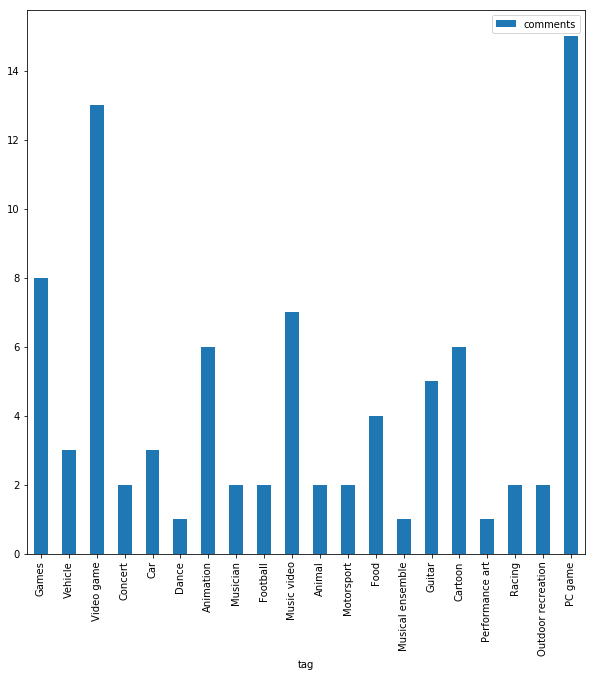

In [94]:
rows.plot.bar(x='tag', y='comments', figsize=(10, 10))

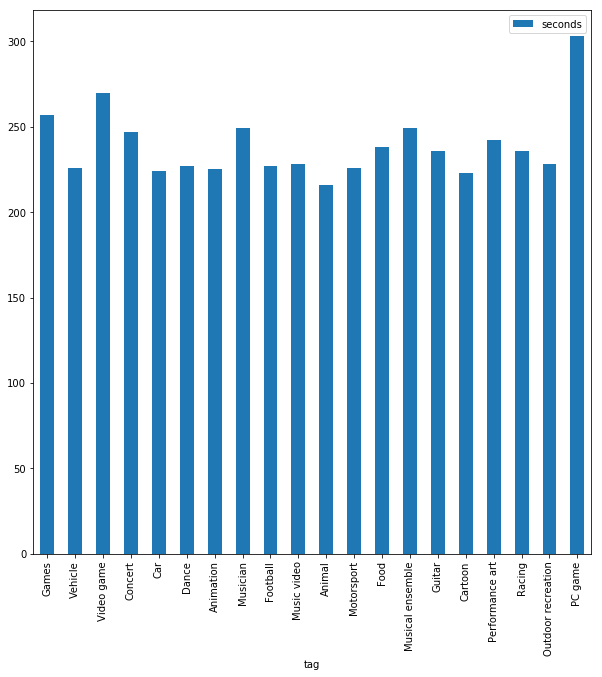

In [101]:
rows.plot.bar(x='tag', y='seconds', figsize=(10, 10))

In [104]:
rows = []
for n in range(20):
    selected = sample_top.ix[sample_top[n] == 1, :]
    label_name = labels['label_name'][n]
    rows += [[label_name] + [np.log(selected['views'].quantile(q)) for q in [0, 0.25, 0.5, 0.75, 1]]]
rows = pd.DataFrame(rows)
rows.columns = ['tag', '0', '0.25', '0.5', '0.75', '1']

In [105]:
rows

,tag,0,0.25,0.5,0.75,1
0,Games,6.908755,7.628031,8.403352,9.550876,18.192091
1,Vehicle,6.908755,7.659171,8.383205,9.466841,18.826272
2,Video game,6.908755,7.700748,8.532279,9.725019,18.220145
3,Concert,6.908755,7.558517,8.240121,9.321211,17.681293
4,Car,6.908755,7.700295,8.493310,9.625690,18.826272
5,Dance,6.908755,7.484930,8.059118,9.021900,17.083772
6,Animation,6.914731,7.891705,8.837246,10.149928,18.366706
7,Musician,6.909753,7.553418,8.191740,9.218383,18.517148
8,Football,6.909753,7.545390,8.261268,9.330521,16.739503
9,Music video,6.911747,7.937732,8.917311,10.460199,19.485193


([<matplotlib.axis.XTick at 0x7f940af99048>,
 <a list of 20 Text xticklabel objects>)

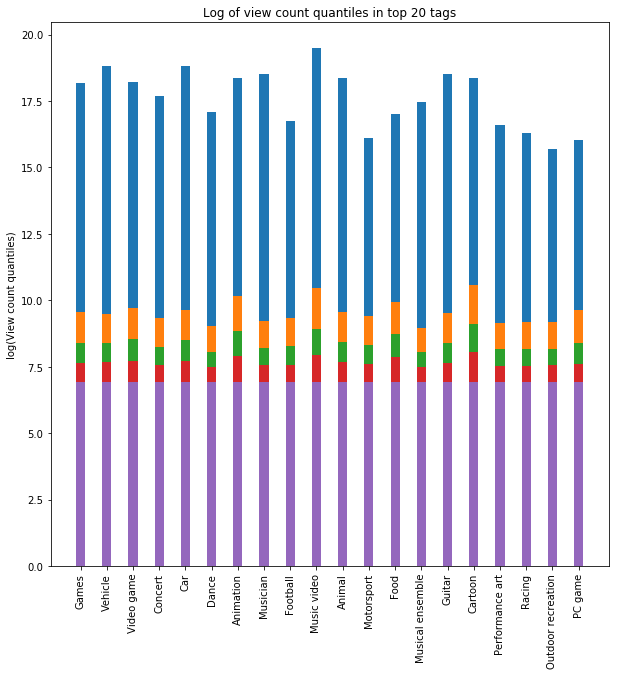

In [107]:
plt.figure(figsize=(10, 10))
ind = np.arange(20)
width = 0.35
# sums = rows['likes'] + rows['dislikes']
# p1 = plt.bar(ind, rows['dislikes'] / sums, width, color='#d62728')
# p2 = plt.bar(ind, rows['likes'] /sums, width,
#              bottom=rows['dislikes'] / sums)
quantiles = ['0', '0.25', '0.5', '0.75', '1']
for i in range(5):
    p = plt.bar(ind, rows[quantiles[4 - i]], width)

plt.ylabel('log(View count quantiles)')
plt.title('Log of view count quantiles in top 20 tags')
plt.xticks(ind, rows['tag'], rotation='vertical')